In [17]:
import numpy as np
np.__version__

'1.26.4'

In [18]:
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version: ", tf.__version__)
print("TensorFlow Hub version: ",hub.__version__)

# Check for GPU availability
print("GPU ", "available (OKKKKKK)" if tf.config.list_physical_devices("GPU") else "not available" )

TensorFlow version:  2.10.0
TensorFlow Hub version:  0.16.1
GPU  available (OKKKKKK)


In [19]:
import pandas as pd
labels_csv = pd.read_csv("data/labels.csv")
print(labels_csv.head())
print(labels_csv.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


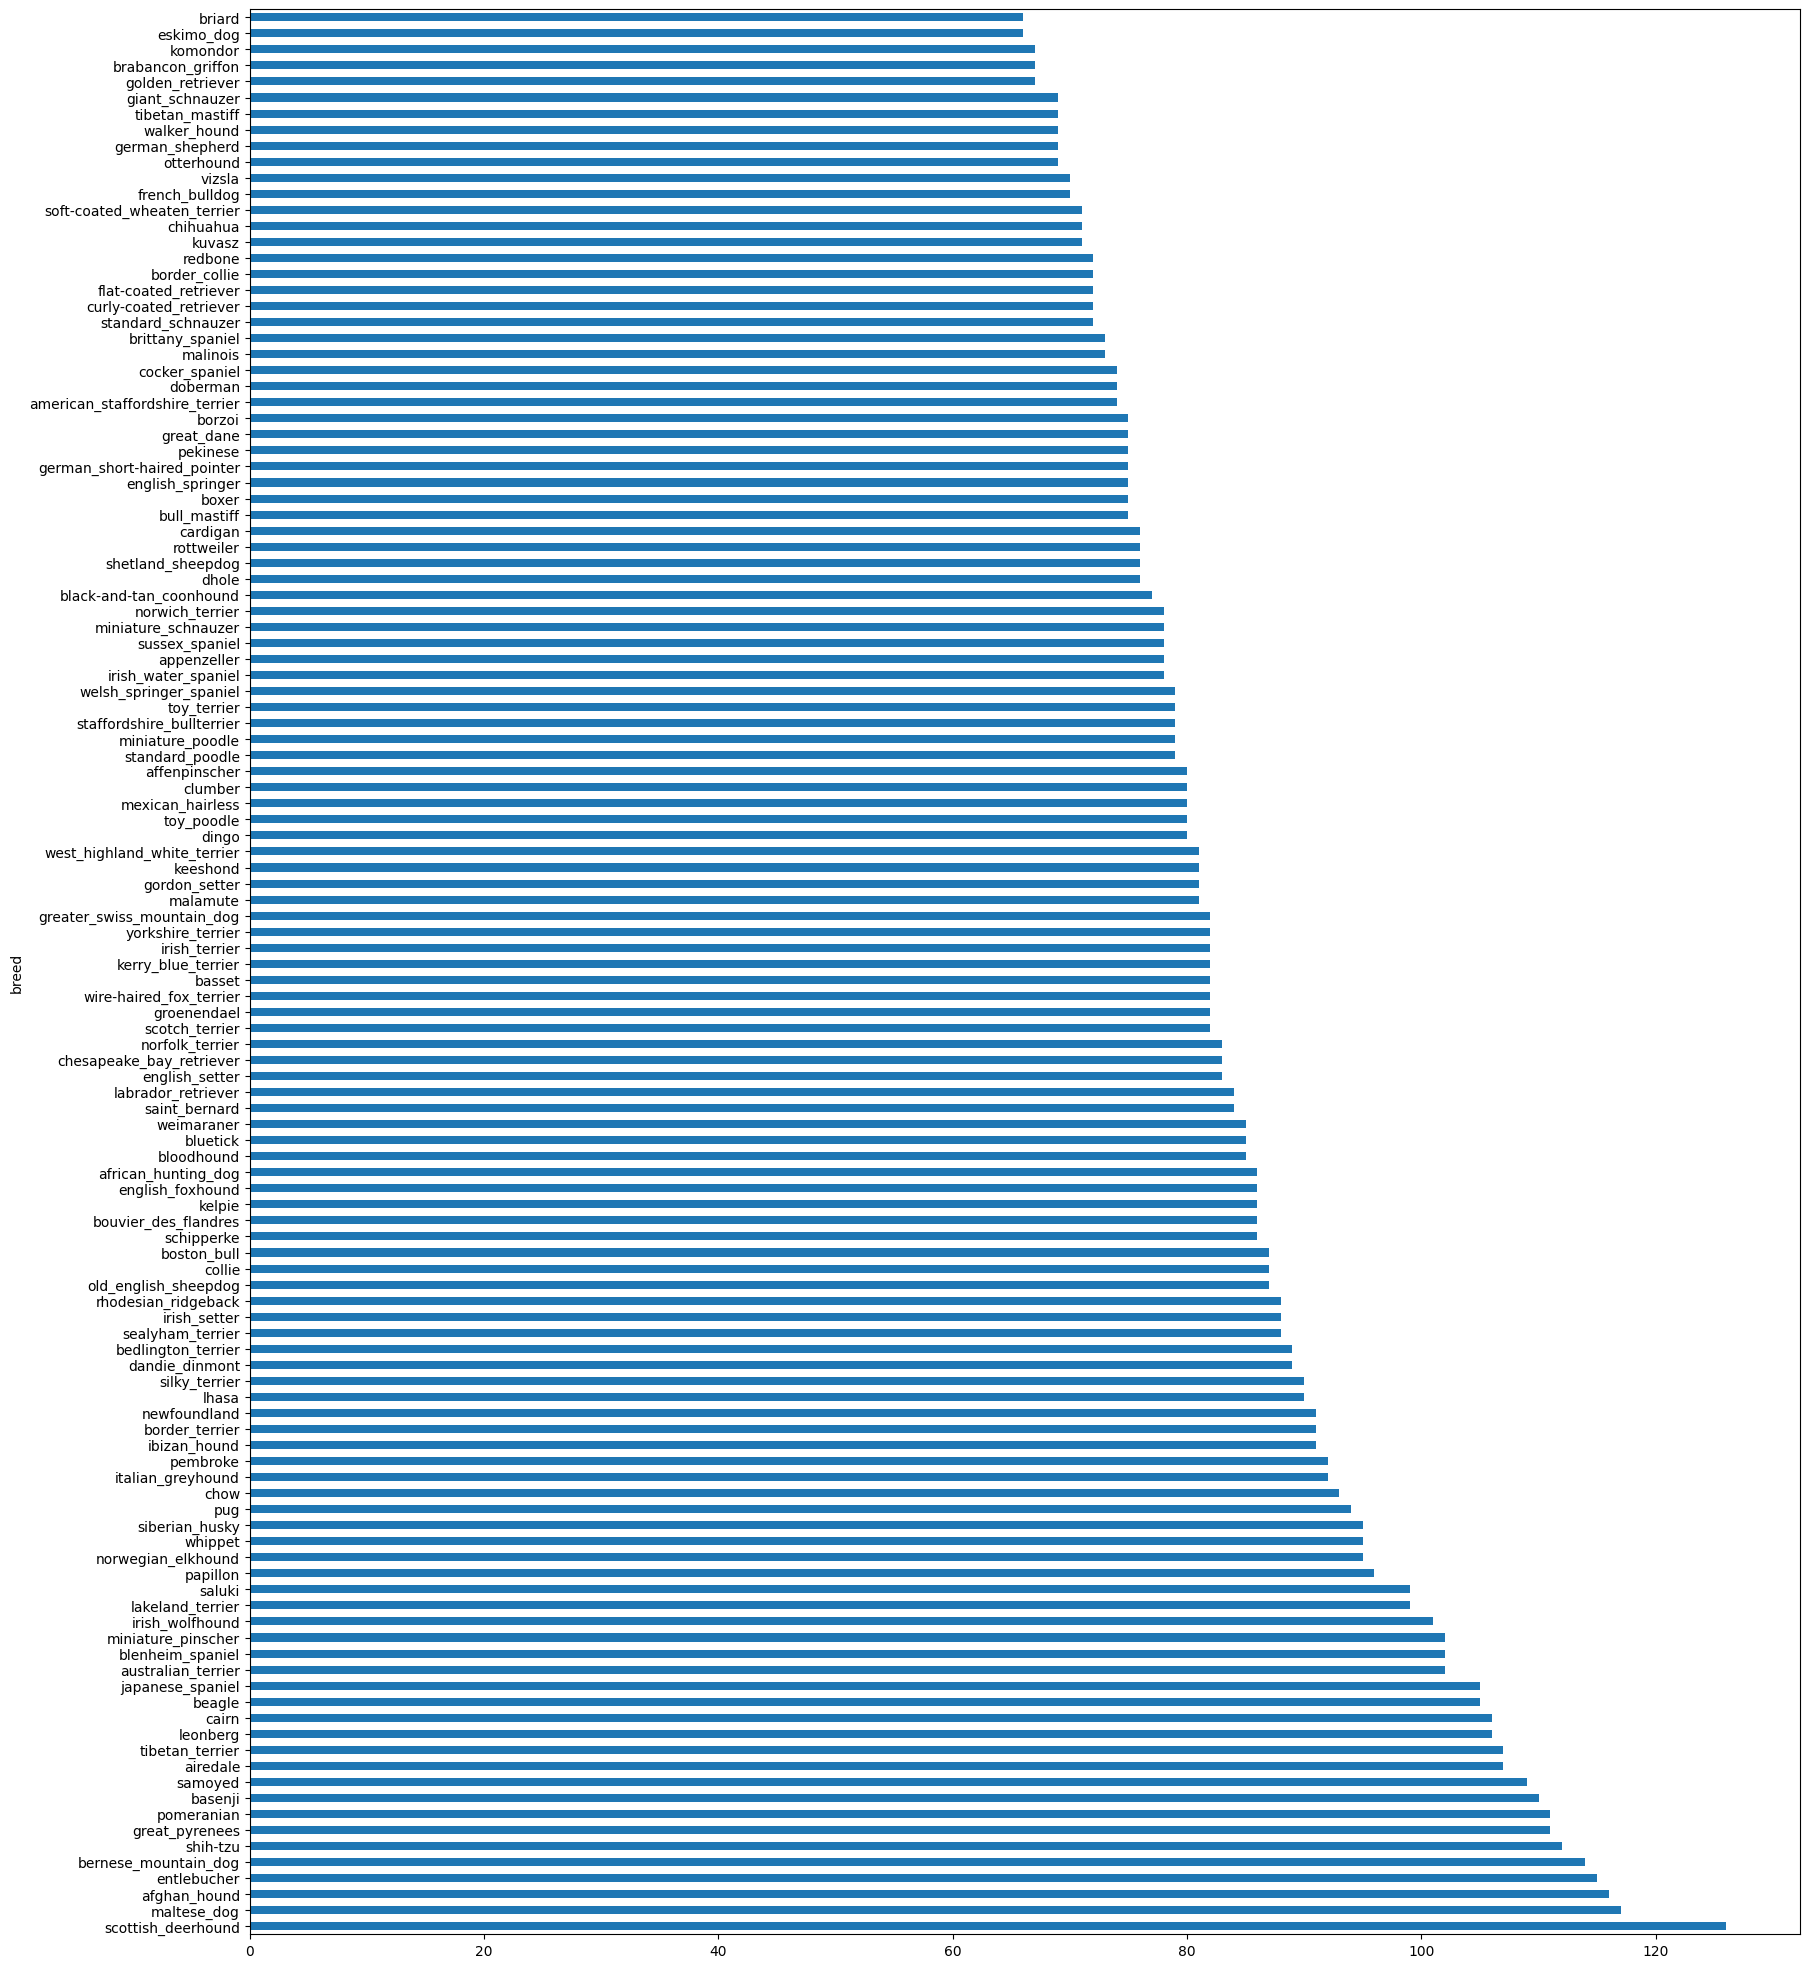

In [20]:
import matplotlib.pyplot as plt

labels_csv["breed"].value_counts().plot(kind="barh", figsize=(20, 25));

In [21]:
labels_csv["breed"].value_counts().median()

82.0

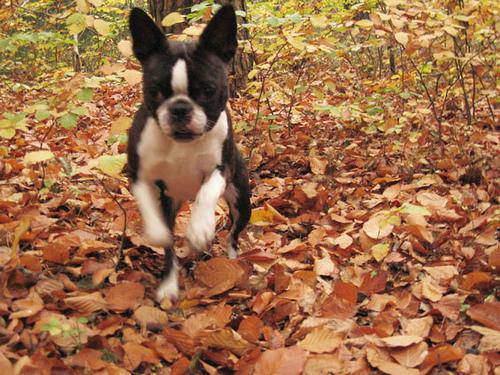

In [22]:
from IPython.display import Image
Image("data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

In [23]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [24]:
filenames = ["data/train/"+fname+ ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

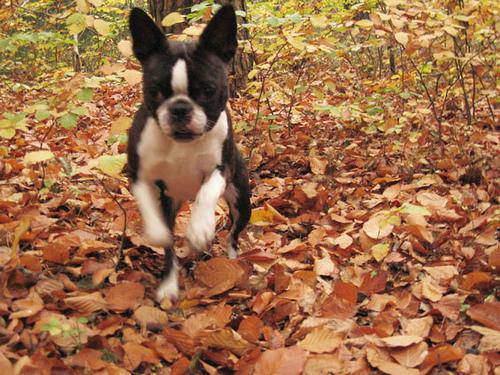

In [25]:
Image(filenames[0])

In [26]:
import os
os.listdir("data/train")[:10]

['000621fb3cbb32d8935728e48679680e.jpg',
 '000bec180eb18c7604dcecc8fe0dba07.jpg',
 '00102ee9d8eb90812350685311fe5890.jpg',
 '0012a730dfa437f5f3613fb75efcd4ce.jpg',
 '001510bc8570bbeee98c8d80c8a95ec1.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001a5f3114548acdefa3d4da05474c2e.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [27]:
if len(os.listdir("data/train")) == len(filenames):
  print("Filenames matched with labels")
else:
  print("Filenames don't match with labels")

Filenames don't match with labels


In [28]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels, len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

#### Check the number of labels matches the number of filenames

In [29]:
if len(labels) == len(filenames):
  print("Labels matched with filenames")
else:
  print("Labels don't match with filenames")

Labels matched with filenames


#### Unique label values

In [30]:
unique_breeds = np.unique(labels)
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

#### Turn every label into a boolean array

In [31]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [32]:
len(labels)

10222

In [33]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [34]:
len(boolean_labels)

10222

In [35]:
print(labels[0])
print(f"Index where label occurs: {np.where(unique_breeds == labels[0])}")
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
Index where label occurs: (array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating validation set

In [36]:
x = filenames
y = boolean_labels

In [37]:
NUM_IMAGES = 1000

In [38]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [39]:
x_train[:2], y_train[:2]

(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,

## Preprocessing Images (turning images into Tensors)

In [40]:
from matplotlib.pyplot import imread
image = imread(filenames[0])
image.shape #height, width

(375, 500, 3)

In [41]:
image.max(), image.min() #RGB

(255, 0)

In [42]:
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [43]:
IMG_SIZE = 224

def process_image(image_path, image_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3) # RGB
  image = tf.image.convert_image_dtype(image, tf.float32) #change 0-255 to 0-1
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) #resize the image to (224, 224)

  return image


### Turning data into bathces

In [44]:
def get_iamge_label(image_path, label):

  image = process_image(image_path)
  return image, label # Main reason is to get a tuple `(image, label)`

In [45]:
BATCH_SIZE = 32

# y=None, test_data don't have labels
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Create a dataset of TF from x
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #labels
    data_batch = data.map(get_iamge_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y))
                                               )
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_iamge_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

#### Create training and validation data batches

In [46]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [47]:
x_val

['data/train/0ca9280205bd68d201e1d708db3f209d.jpg',
 'data/train/12405b2e93417d81f5308769c4e184c7.jpg',
 'data/train/1242da788ce85d4311e1cc9922a0a809.jpg',
 'data/train/1015e4eba660def32e7e52b89fe3a9c6.jpg',
 'data/train/09d5ac8026b8a7f7d1acae244765fe24.jpg',
 'data/train/1089c1e5058ffff12e1cca2e85205ed8.jpg',
 'data/train/0f5dd4999e44100d74f68c789f3edc54.jpg',
 'data/train/0c64a816fcd8aa13dbd4e874307bad51.jpg',
 'data/train/14e9a6d002632db71a18283fc024f086.jpg',
 'data/train/032c14b2df4193004913b01ab48f87c6.jpg',
 'data/train/14095922a772c94921a065006a9fa454.jpg',
 'data/train/01dffcb02d6cba7d2b101fcc93daa6f1.jpg',
 'data/train/0f976e55b3634296183b2b1c051d5bda.jpg',
 'data/train/17f15b80ab3238f1fbe5961286db0eba.jpg',
 'data/train/16f37498dbfe77fae6d442465e7356eb.jpg',
 'data/train/160160c8ac562966448486906cb56308.jpg',
 'data/train/06c4dbc5b0ea3674bbc752c4ce76819a.jpg',
 'data/train/157e9d7fb607da0ff1d324933b9cbddf.jpg',
 'data/train/12dfab0ecfdd9475b561febf2533513a.jpg',
 'data/train

In [48]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [49]:
unique_breeds[:5]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier'], dtype=object)

In [50]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [51]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize=(12,12))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1) # row column index
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")     

In [52]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [53]:
train_images, train_labels = next(train_data.as_numpy_iterator()) # unbatche
len(train_images), len(train_labels)

(32, 32)

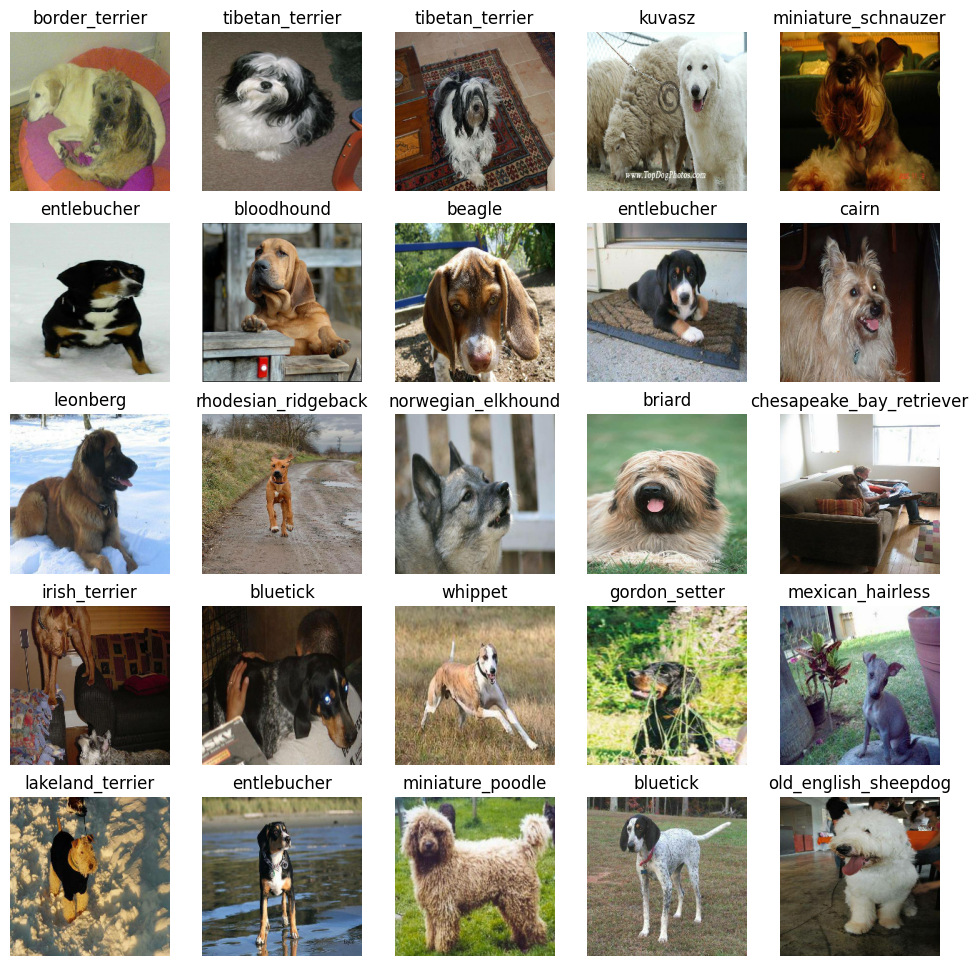

In [54]:
train_images, train_labels = next(train_data.as_numpy_iterator()) # unbatche
show_25_images(train_images, train_labels)

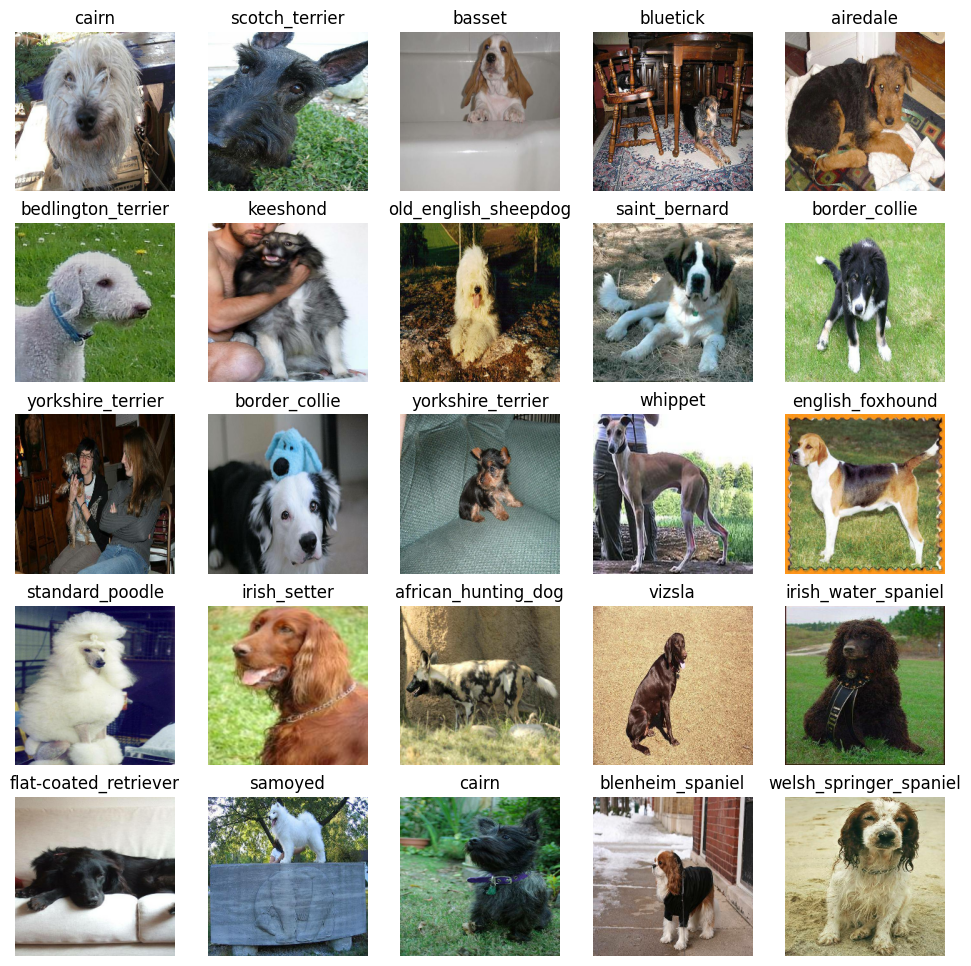

In [55]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [56]:
IMG_SIZE, len(unique_breeds)

(224, 120)

In [57]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, channels
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification"

In [58]:
from tensorflow.keras.optimizers import Adam
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
    print("Building model with: ", MODEL_URL)
    
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax")
    ])
    
    #? Hill story
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(), #? Height of the hill
        optimizer = Adam(), #? Friend
        metrics = ["accuracy"] #? The Judge
    )
    
    model.build(INPUT_SHAPE)
    
    return model

In [59]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Callbacks

#### TensorBoard

In [60]:
%load_ext tensorboard

In [61]:
import datetime

def create_tensorboard_callback():
    logdir = os.path.join("logs",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback

In [62]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model

#### On subset of data

In [63]:
NUM_EPOCHS = 100 

In [64]:
def train_model():
    model = create_model()
    
    tensorboard = create_tensorboard_callback()
    
    model.fit(x = train_data,
              epochs = NUM_EPOCHS,
              validation_data = val_data,
              validation_freq = 1,
              callbacks = [tensorboard, early_stopping])
    return model

In [65]:
# model = train_model()

#### Checking the TensorBoard logs

In [66]:
# %tensorboard --logdir D:/DS_AI/dog-vision/logs
#Optional

#### Making and evaluating predictions using a trained model

In [67]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [68]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 7s 94ms/step


array([[0.00366375, 0.00335366, 0.00531707, ..., 0.00113175, 0.00363632,
        0.00112419],
       [0.00078033, 0.00361968, 0.00413186, ..., 0.00067478, 0.00094053,
        0.00350088],
       [0.00028927, 0.00232523, 0.00174976, ..., 0.00096281, 0.0013199 ,
        0.00222607],
       ...,
       [0.00237179, 0.00256441, 0.00351649, ..., 0.00191574, 0.00509153,
        0.00483259],
       [0.01604851, 0.01242154, 0.0045394 , ..., 0.01269303, 0.02527216,
        0.02178522],
       [0.00898319, 0.0017791 , 0.00889881, ..., 0.0074419 , 0.00345703,
        0.00544246]], dtype=float32)

In [69]:
predictions.shape

(200, 120)

In [70]:
len(y_val), len(unique_breeds)

(200, 120)

In [71]:
np.sum(predictions[0])

0.9999999

In [72]:
def get_pred_label(predictions_probabilities):
    return unique_breeds[np.argmax(predictions_probabilities)]

pred_label = get_pred_label(predictions[0])
pred_label

'japanese_spaniel'

In [73]:
def unbatchify(data):
    imgaes = []
    labels = []
    for imgae, label in data.unbatch().as_numpy_iterator():
        imgaes.append(imgae)
        labels.append(unique_breeds[np.argmax(label)])
        
    return imgaes, labels

val_imgaes, val_labels = unbatchify(val_data)
val_imgaes[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [74]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    pred_label = get_pred_label(pred_prob)
    
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), 
                                color = color)

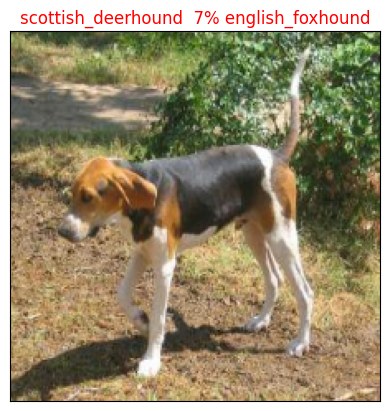

In [75]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_imgaes, n = 42)

In [76]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    
    pred_label = get_pred_label(pred_prob)
    
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color = "grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels = top_10_pred_labels,
               rotation = "vertical")
    
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass
    

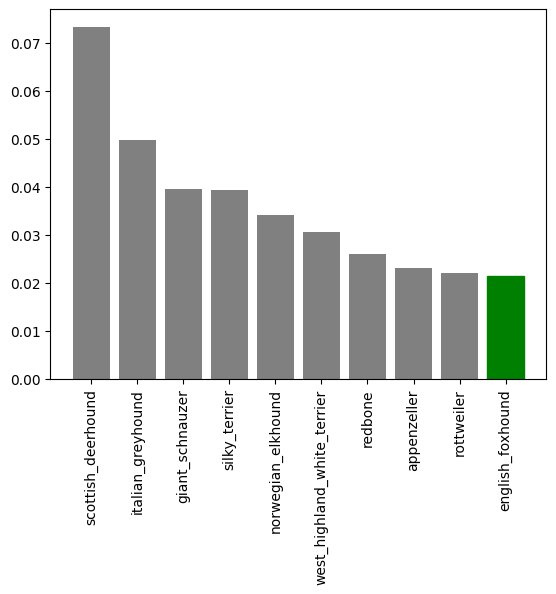

In [77]:
plot_pred_conf(prediction_probabilities = predictions, labels = val_labels, n = 42)

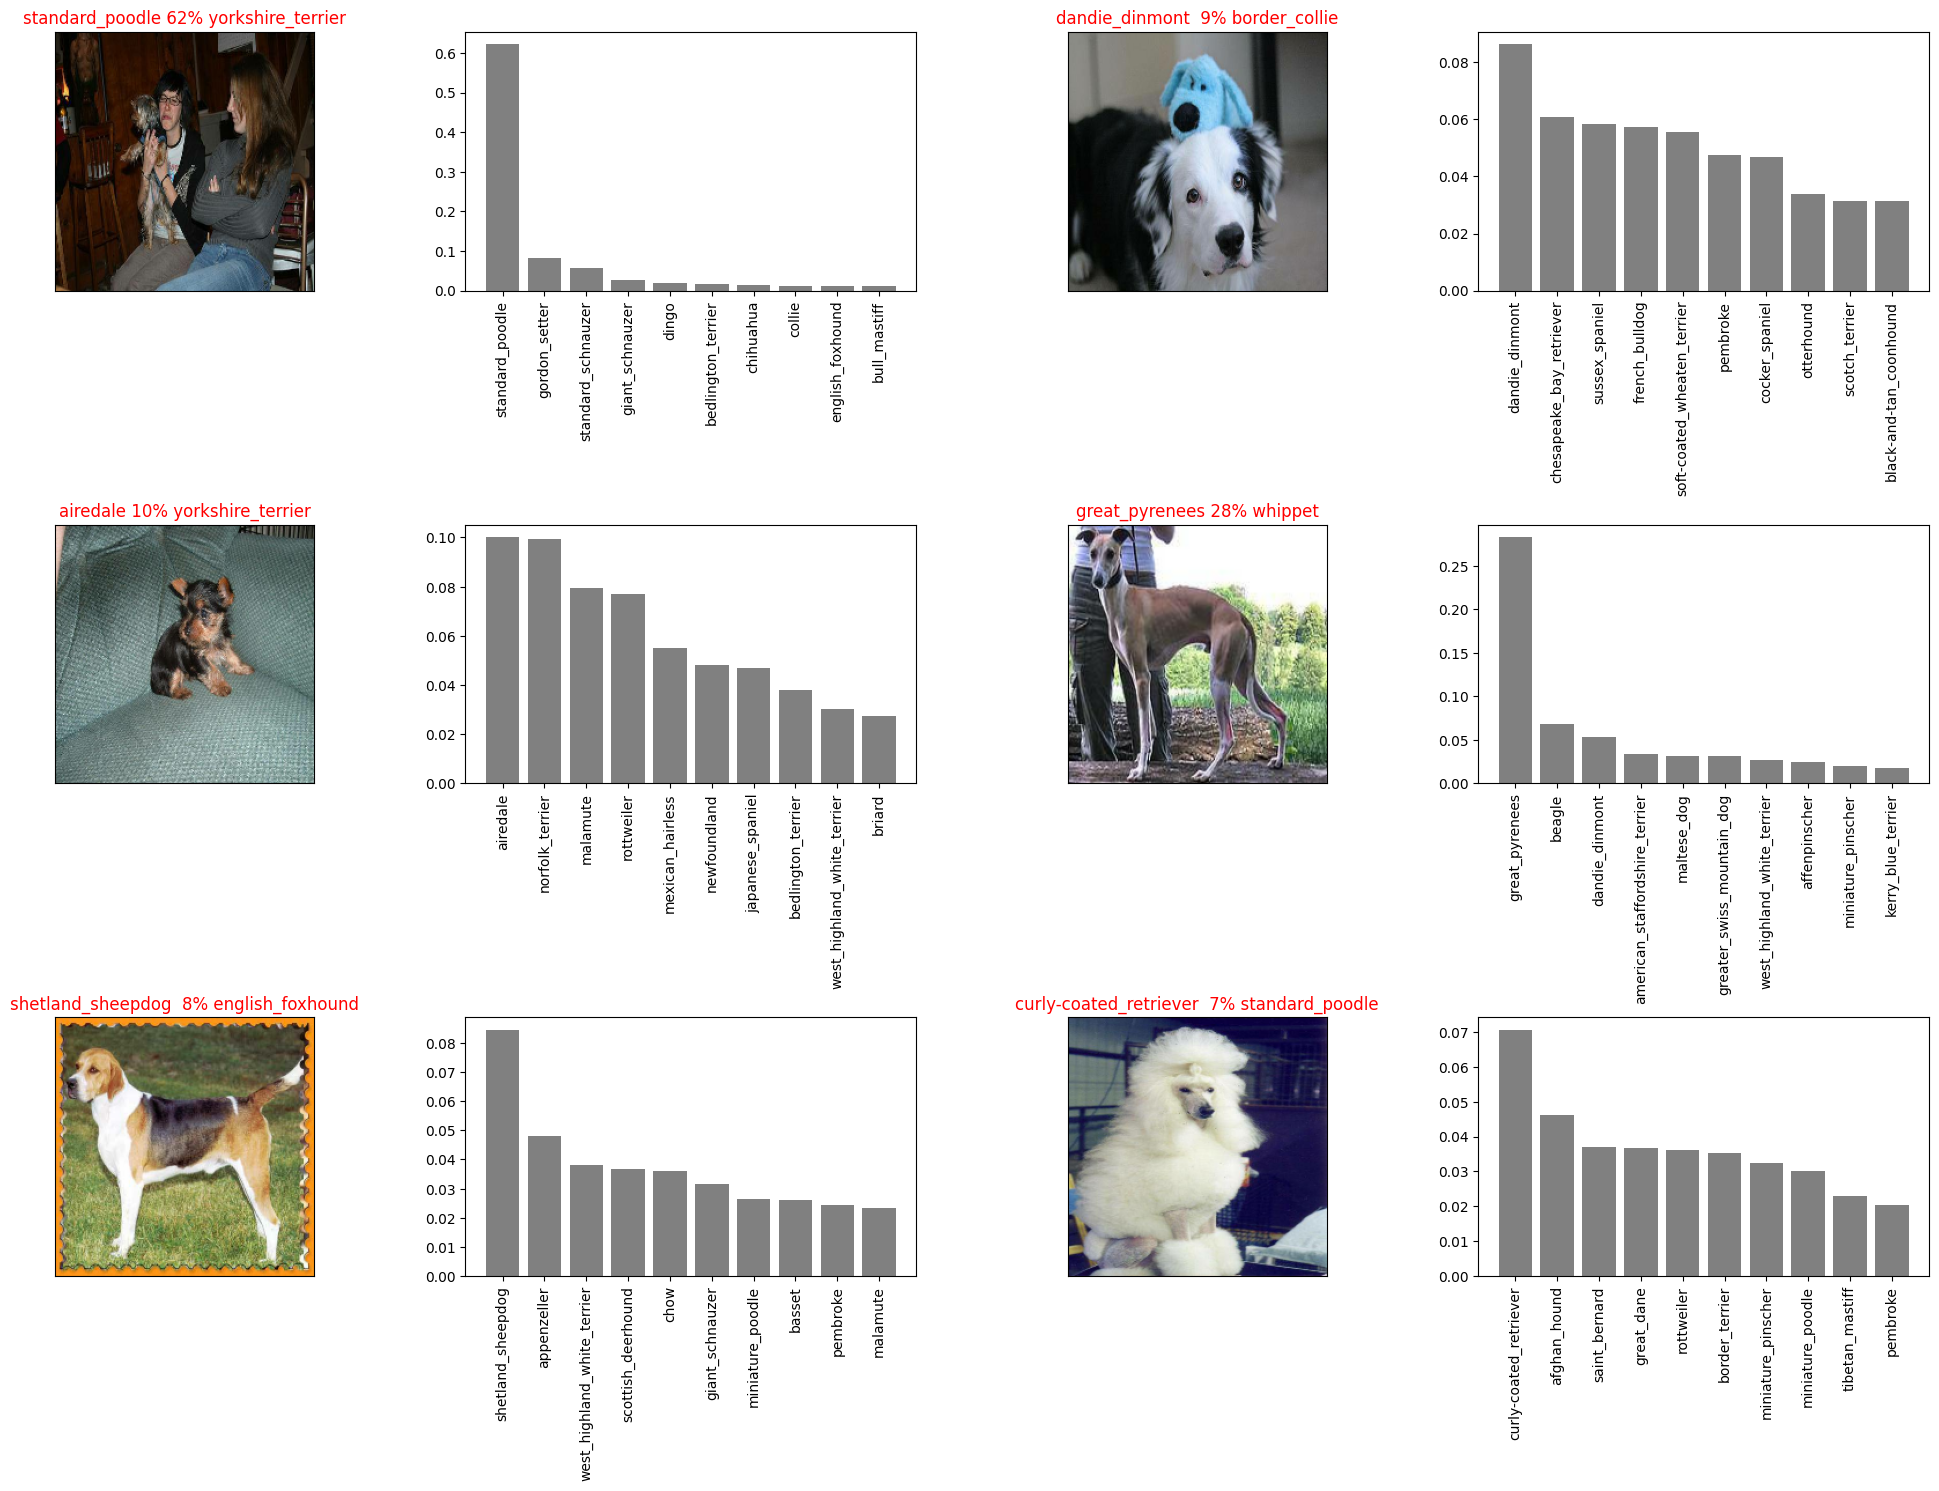

In [78]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels = val_labels,
              images = val_imgaes,
              n = i + i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels = val_labels,
                   n = i + i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

## Saving and reloading a trained model

In [79]:
def save_model(model, suffix = None):
    modeldir = os.path.join("models",
                            "model")
    model_path = modeldir + "-" + suffix + ".h5"
    print(f"Saving model to: {model_path}")
    model.save(model_path)
    return model_path

In [80]:
def load_model(model_path):
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer": hub.KerasLayer})
    return model

In [81]:
# save_model(model, suffix = "1000-images-mobilenetv2-Adam")

In [82]:
loaded_1000_images_model = load_model("models/20241107-154737-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: models/20241107-154737-1000-images-mobilenetv2-Adam.h5


In [83]:
# Pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 89ms/step - loss: 5.5990 - accuracy: 0.0050


[5.5989532470703125, 0.004999999888241291]

In [84]:
#The loaded model
loaded_1000_images_model.evaluate(val_data)

7/7 [==============================] - 1s 92ms/step - loss: 1.2497 - accuracy: 0.6700


[1.2496833801269531, 0.6700000166893005]

## Training model mobilenetV2 on the full data

In [85]:
len(x), len(y)

(10222, 10222)

In [86]:
x_train[:5], len(x_train)

(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 800)

In [134]:
np.random.seed(42)
x_train_mobilenetV2, x_test_mobilenetV2, y_train_mobilenetV2, y_test_mobilenetV2 = train_test_split(x, y,
                                                                                                    test_size=0.15,
                                                                                                    random_state=42)
len(x_train_mobilenetV2), len(x_test_mobilenetV2), len(y_train_mobilenetV2), len(y_test_mobilenetV2)

(8688, 1534, 8688, 1534)

In [88]:
full_data = create_data_batches(x_train_mobilenetV2, y_train_mobilenetV2)
full_data

Creating training data batches...


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [89]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification


In [90]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [130]:
batch_accuracy_callback = tf.keras.callbacks.LambdaCallback(
    on_train_batch_end=lambda batch, logs: print(f" Batch {batch + 1} - Accuracy: {logs.get('accuracy'):.4f}")
)

In [ ]:
# full_model.fit(x = full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard, full_model_early_stopping, batch_accuracy_callback])
# save_model(full_model, suffix = "full-imgae-set-mobilenetV2-Adam")

Epoch 1/100
Batch 1 - Accuracy: 0.0312
272/272 [==============================] - 39s 120ms/step - loss: 4.6883 - accuracy: 0.3781
Epoch 2/100
Batch 1 - Accuracy: 0.5938
272/272 [==============================] - 33s 123ms/step - loss: 4.4897 - accuracy: 0.6770
Epoch 3/100
Batch 1 - Accuracy: 0.8125
272/272 [==============================] - 31s 113ms/step - loss: 4.2952 - accuracy: 0.7424
Epoch 4/100
Batch 1 - Accuracy: 0.8438
272/272 [==============================] - 30s 110ms/step - loss: 4.1042 - accuracy: 0.7822
Epoch 5/100
Batch 1 - Accuracy: 0.7500
272/272 [==============================] - 30s 111ms/step - loss: 3.9167 - accuracy: 0.8063
Epoch 6/100
Batch 1 - Accuracy: 0.8125
272/272 [==============================] - 30s 112ms/step - loss: 3.7325 - accuracy: 0.8184
Epoch 7/100
Batch 1 - Accuracy: 0.8125
272/272 [==============================] - 30s 111ms/step - loss: 3.5520 - accuracy: 0.8307
Epoch 8/100
Batch 1 - Accuracy: 0.8125
272/272 [==============================] - 3

'models\\model-full-imgae-set-mobilenetV2-Adam.h5'

In [129]:
loaded_full_model_mobilenetV2 = load_model("./models/model-full-imgae-set-mobilenetV2-Adam.h5")

Loading saved model from: ./models/model-full-imgae-set-mobilenetV2-Adam.h5


In [136]:
val_data_mobilenetV2 = create_data_batches(x_test_mobilenetV2, y_test_mobilenetV2, valid_data=True)

Creating validation data batches...


In [137]:
loaded_full_model_mobilenetV2.evaluate(val_data_mobilenetV2)

48/48 [==============================] - 7s 124ms/step - loss: 0.4993 - accuracy: 0.8937


[0.49928519129753113, 0.8937418460845947]

In [138]:
test_data_mobilenetV2 = create_data_batches(x_test_mobilenetV2, test_data=True)

Creating test data batches...


In [139]:
from sklearn.metrics import accuracy_score
predictions_mobilenetV2 = loaded_full_model_mobilenetV2.predict(test_data_mobilenetV2,
                                          verbose=1)
predictions_mobilenetV2

48/48 [==============================] - 7s 125ms/step


array([[7.5539108e-05, 4.1694031e-05, 4.0759813e-05, ..., 8.9446420e-04,
        9.7789372e-05, 7.8051083e-04],
       [5.2463449e-05, 8.6391672e-05, 7.1242990e-05, ..., 4.8565573e-05,
        5.3195337e-05, 1.1052498e-04],
       [2.6503741e-03, 3.1491596e-04, 9.6240932e-05, ..., 2.1473416e-03,
        2.2333962e-04, 3.4124538e-04],
       ...,
       [3.6678601e-05, 4.3905282e-05, 5.0143844e-05, ..., 3.9582963e-05,
        4.0718554e-05, 5.4134853e-04],
       [9.6718460e-01, 5.7701200e-05, 7.1038223e-05, ..., 3.8735168e-05,
        7.3927193e-05, 1.4781040e-03],
       [7.4048311e-04, 3.1641134e-04, 3.8390126e-04, ..., 4.0579116e-04,
        3.0057327e-04, 5.1681290e-04]], dtype=float32)

In [140]:
predictions_mobilenetV2[0].shape

(120,)

In [141]:
predictions_mobilenetV2.shape

(1534, 120)

In [142]:
predictions_mobilenetV2 = predictions_mobilenetV2.argmax(axis=1)
predictions_mobilenetV2

array([111,  56,  97, ...,  73,   0,  41], dtype=int64)

In [143]:
y_test_mobilenetV2 = np.array(y_test_mobilenetV2)

y_test_mobilenetV2 = y_test_mobilenetV2.argmax(axis=1)
y_test_mobilenetV2

array([111,  56,  97, ...,  73,   0,  41], dtype=int64)

In [144]:
accuracy_mobilenetV2 = accuracy_score(y_test_mobilenetV2, predictions_mobilenetV2)
print(f'Accuracy: {accuracy_mobilenetV2 * 100:.2f}%')

Accuracy: 89.37%


## Making predictions on custom images

In [145]:
custom_path = "data/custom-test/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [146]:
custom_image_paths

['data/custom-test/dog-image-1.jpg',
 'data/custom-test/dog-image-2.jpg',
 'data/custom-test/dog-image-3.jpg',
 'data/custom-test/dog-image-4.jpg']

In [147]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [148]:
custom_preds = loaded_full_model_mobilenetV2.predict(custom_data)

1/1 [==============================] - 0s 154ms/step


In [149]:
custom_preds.shape

(4, 120)

In [150]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['dingo', 'boston_bull', 'samoyed', 'miniature_poodle']

In [151]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)


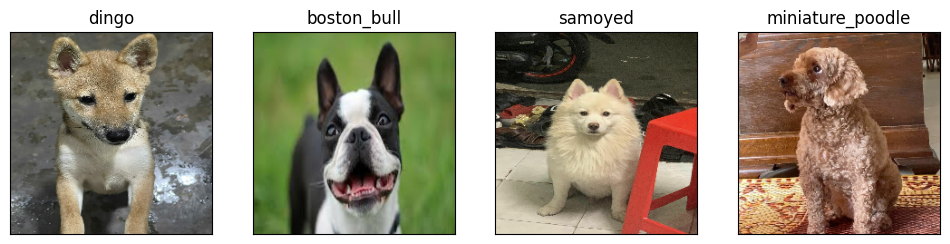

In [152]:
plt.figure(figsize=(12,12))
for i, image in enumerate(custom_images):
    plt.subplot(1, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)

In [153]:
len(unique_breeds)

120

## Training model efficientnet on the full data

In [154]:
MODEL_URL = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1"

In [155]:
np.random.seed(42)
x_train_efficientnet, x_test_efficientnet, y_train_efficientnet, y_test_efficientnet = train_test_split(x, y,
                                                                                        test_size=0.15,
                                                                                        random_state=42)
len(x_train_efficientnet), len(x_test_efficientnet), len(y_train_efficientnet), len(y_test_efficientnet)

(8688, 1534, 8688, 1534)

In [156]:
full_data = create_data_batches(x_train_efficientnet, y_train_efficientnet)
full_model = create_model()

full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

Creating training data batches...
Building model with:  https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1


In [157]:
val_data_efficientnet = create_data_batches(x_test_efficientnet, y_test_efficientnet, valid_data=True)

Creating validation data batches...


In [ ]:
# full_model.fit(x = full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard, full_model_early_stopping, batch_accuracy_callback])
# full_model.save("./models/efficientnet.keras")

Epoch 1/100
 Batch 1 - Accuracy: 0.0000
272/272 [==============================] - 39s 118ms/step - loss: 4.6878 - accuracy: 0.3710
Epoch 2/100
 Batch 1 - Accuracy: 0.5938
272/272 [==============================] - 34s 123ms/step - loss: 4.4900 - accuracy: 0.6724
Epoch 3/100
 Batch 1 - Accuracy: 0.7500
272/272 [==============================] - 31s 114ms/step - loss: 4.2955 - accuracy: 0.7425
Epoch 4/100
 Batch 1 - Accuracy: 0.8125
272/272 [==============================] - 32s 118ms/step - loss: 4.1044 - accuracy: 0.7670
Epoch 5/100
 Batch 1 - Accuracy: 0.7812
272/272 [==============================] - 33s 121ms/step - loss: 3.9165 - accuracy: 0.7904
Epoch 6/100
 Batch 1 - Accuracy: 0.7812
272/272 [==============================] - 32s 116ms/step - loss: 3.7325 - accuracy: 0.8127
Epoch 7/100
 Batch 1 - Accuracy: 0.8438
272/272 [==============================] - 33s 120ms/step - loss: 3.5521 - accuracy: 0.8252
Epoch 8/100
 Batch 1 - Accuracy: 0.8125
272/272 [===========================

In [159]:
loaded_full_model_efficientnet = load_model("./models/efficientnet.keras")

Loading saved model from: ./models/efficientnet.keras


In [160]:
loaded_full_model_efficientnet.evaluate(val_data_efficientnet)

48/48 [==============================] - 9s 129ms/step - loss: 0.4864 - accuracy: 0.8931


[0.4863925278186798, 0.8930899500846863]

In [161]:
test_data_efficientnet = create_data_batches(x_test_efficientnet, test_data=True)
predictions_efficientnet = loaded_full_model_efficientnet.predict(test_data_efficientnet,
                                          verbose=1)

Creating test data batches...
48/48 [==============================] - 8s 126ms/step


In [162]:
predictions_efficientnet[0].shape

(120,)

In [163]:
predictions_efficientnet = predictions_efficientnet.argmax(axis=1)
predictions_efficientnet

array([111,  56,  97, ...,  73,   0,  41], dtype=int64)

In [164]:
predictions_efficientnet.shape

(1534,)

In [165]:
y_test_efficientnet = np.array(y_test_efficientnet)

y_test_efficientnet = y_test_efficientnet.argmax(axis=1)
y_test_efficientnet


array([111,  56,  97, ...,  73,   0,  41], dtype=int64)

In [166]:
accuracy_efficientnet = accuracy_score(y_test_efficientnet, predictions_efficientnet)
print(f'Accuracy: {accuracy_efficientnet * 100:.2f}%')

Accuracy: 89.31%


## Tensorboard

In [167]:
# %load_ext tensorboard
# %tensorboard --logdir D:/DS_AI/dog-vision/logs

## Compare 2 models

C:\Users\1202p\AppData\Local\Temp\ipykernel_19492\4002398399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


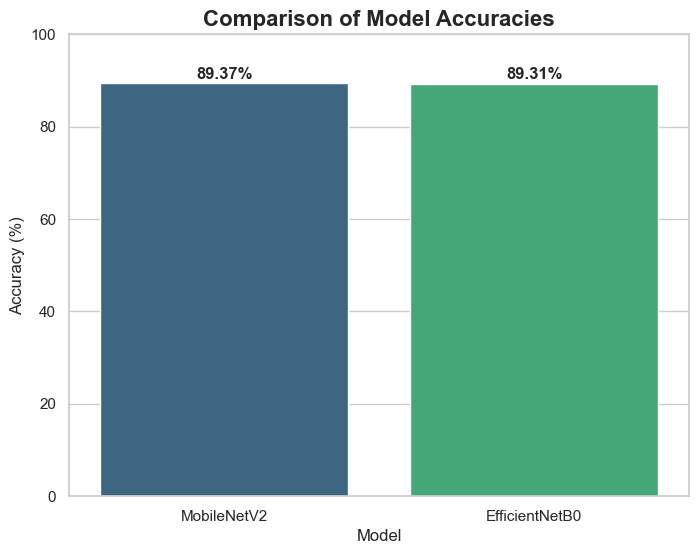

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['MobileNetV2', 'EfficientNetB0']
accuracies = [round(accuracy_mobilenetV2*100,2), round(accuracy_efficientnet*100,2)]

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

sns.barplot(x=model_names, y=accuracies, palette="viridis")

plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Comparison of Model Accuracies", fontsize=16, fontweight='bold')
plt.ylim(0, 100)

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v}%", ha='center', fontweight='bold')

plt.show();
